In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('nutrition-drinks.csv')
df.head()
df.tail()
num_rows, num_cols = df.shape
print("Number of columns: ", num_cols)
print("Number of rows: ", num_rows)
for i in df.columns:
    unique = df[i].unique()
    num_unique = df[i].nunique()
    print("For column ",i,", unique enteries  are as follows: ", unique)
    print("For column ",i,", number of unique enteries are: ", num_unique)

Number of columns:  7
Number of rows:  177
For column  Unnamed: 0 , unique enteries  are as follows:  ['Cool Lime Starbucks Refreshers™ Beverage' 'Ombré Pink Drink'
 'Pink Drink' 'Strawberry Acai Starbucks Refreshers™ Beverage'
 'Very Berry Hibiscus Starbucks Refreshers™ Beverage' 'Violet Drink'
 'Evolution Fresh™ Cold-Pressed Apple Berry Juice'
 'Evolution Fresh™ Defense Up' 'Evolution Fresh™ Organic Ginger Limeade'
 'Iced Coffee' 'Iced Coffee with Milk'
 'Iced Espresso Classics - Vanilla Latte'
 'Iced Espresso Classics - Caffe Mocha'
 'Iced Espresso Classics - Caramel Macchiato'
 'Starbucks® Caramel Iced Coffee' 'Starbucks® Iced Coffee + Milk'
 'Starbucks® Low Calorie Iced Coffee + Milk'
 'Starbucks® Vanilla Iced Coffee' 'Shaken Sweet Tea'
 'Tazo® Bottled Berry Blossom White' 'Tazo® Bottled Black Mango'
 'Tazo® Bottled Black with Lemon' 'Tazo® Bottled Brambleberry'
 'Tazo® Bottled Giant Peach' 'Tazo® Bottled Iced Passion'
 'Tazo® Bottled Lemon Ginger' 'Tazo® Bottled Organic Black Lem

In [79]:
df.dtypes

Unnamed: 0    object
Calories      object
Fat (g)       object
Carb. (g)     object
Fiber (g)     object
Protein       object
Sodium        object
dtype: object

In [80]:
null_count = df.isnull().sum()
df_new = df.dropna()
print(df_new)

                                            Unnamed: 0 Calories Fat (g)  \
0             Cool Lime Starbucks Refreshers™ Beverage       45       0   
1                                     Ombré Pink Drink        -       -   
2                                           Pink Drink        -       -   
3       Strawberry Acai Starbucks Refreshers™ Beverage       80       0   
4    Very Berry Hibiscus Starbucks Refreshers™ Beve...       60       0   
..                                                 ...      ...     ...   
172                                 Chocolate Smoothie      320       5   
173                                Strawberry Smoothie      300       2   
174                                         Ginger Ale        -       -   
175                                          Lemon Ale        -       -   
176                                  Orange Cream Soda        -       -   

    Carb. (g) Fiber (g) Protein Sodium  
0          11         0       0     10  
1           -    

In [81]:
print(df_new.columns)
df_new = df_new.rename(columns={
    'Calories': 'Calories (kcal)',
    'Carb. (g)': 'Carbohydrates (g)',
    'Fat (g)': 'Total Fat (g)'
})
df_new = df_new.drop(columns=['Sodium', 'Unnamed: 0'])
print(df_new.columns)


Index(['Unnamed: 0', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)',
       'Protein', 'Sodium'],
      dtype='object')
Index(['Calories (kcal)', 'Total Fat (g)', 'Carbohydrates (g)', 'Fiber (g)',
       'Protein'],
      dtype='object')


Question 5 asks to do some operations on columns with numerical values. But, in 'nutrition-drinks.csv', there are no numerical values, as we saw above when I used 'df.dtypes'.

In [82]:
new_num_rows, num_new_columns = df_new.shape
sample = int(new_num_rows * 0.25)
subset = []
original = df_new.copy()
for i in range(4):
    sampled_subset = original.sample(sample, replace=False)
    subset.append(sampled_subset)
    original = original[~original.index.isin(sampled_subset.index)]
subset_1, subset_2, subset_3, subset_4 = subset
print("Subset 1:")
print(subset_1)
print("\nSubset 2:")
print(subset_2)
print("\nSubset 3:")
print(subset_3)
print("\nSubset 4:")
print(subset_4)
    

Subset 1:
    Calories (kcal) Total Fat (g) Carbohydrates (g) Fiber (g) Protein
161               -             -                 -         -       -
9                 0             0                 0         0       0
73               10             0                 2         0       1
125             230             6                36         4       9
84              140             0                35         0       0
58                -             -                 -         -       -
92                -             -                 -         -       -
76                -             -                 -         -       -
123               -             -                 -         -       -
113             290             8                42         4      13
52                -             -                 -         -       -
157               -             -                 -         -       -
100               5             0                 0         0       0
145       

In the response above, I took refernce from 'numpy.org', 'pandas.pydata.org', some YouTube videos, and some AI tools

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
        1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]),
 <BarContainer object of 20 artists>)

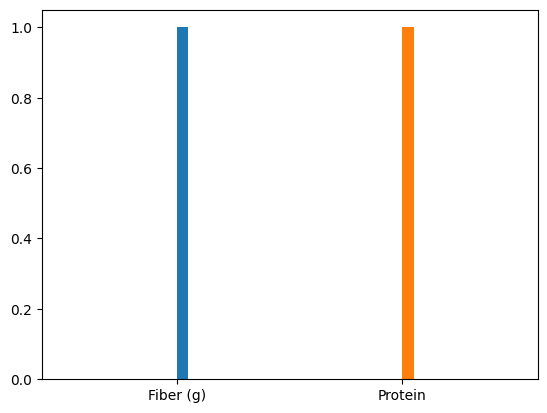

In [83]:
plt.hist(df.columns[4],   bins=20)
plt.hist(df.columns[5], bins=20)

<Axes: >

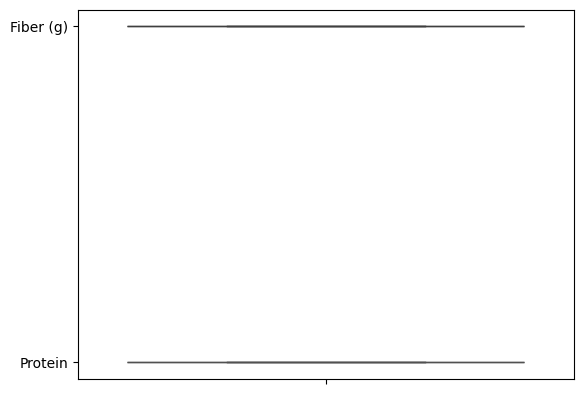

In [84]:
sns.boxplot(df.columns[4])
sns.boxplot(df.columns[5])